In [11]:
#%matplotlib inline
%load_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt
import math
import numpy as np
import pycuda.autoinit
import pycuda.driver as cuda
import pycuda.compiler
from pycuda.compiler import SourceModule
import sys
import geebls
import gfilter
import getstat
import read_keplerlc as keplc
import read_keplertarg as kep
from astropy import wcs
from astropy.io import fits
import pylab

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def getwcoord(pixcoord1,pixcoord2):
    pixcoord=np.array([pixcoord1,pixcoord2]).transpose()
    wcoord=[]
    for i in range(0,pixcoord.shape[0]): 
        wc=w.wcs_pix2world(pixcoord[i],1)
        wcoord.append(wc)
    wcoord=np.array(wcoord) #RA DEC coordinate
    return wcoord

In [31]:
mydir="/home/kawahara/gbls/"
taglist=kep.get_taglist(mydir,"003835482/")
print(taglist)

/home/kawahara/gbls/targ/003835482//*fits.gz
['003835482-2009166043257', '003835482-2009259160929', '003835482-2009350155506', '003835482-2010078095331', '003835482-2010174085026', '003835482-2010265121752', '003835482-2010355172524', '003835482-2011073133259', '003835482-2011177032512', '003835482-2011271113734', '003835482-2012004120508', '003835482-2012088054726', '003835482-2012179063303', '003835482-2012277125453', '003835482-2013011073258', '003835482-2013098041711', '003835482-2013131215648']


/home/kawahara/gbls//targ/003835482/kplr003835482-2009166043257_lpd-targ.fits.gz
1.0
[[ 1103.  1103.  1103.  1103.  1103.  1103.  1103.]
 [ 1104.  1104.  1104.  1104.  1104.  1104.  1104.]
 [ 1105.  1105.  1105.  1105.  1105.  1105.  1105.]
 [ 1106.  1106.  1106.  1106.  1106.  1106.  1106.]
 [ 1107.  1107.  1107.  1107.  1107.  1107.  1107.]
 [ 1108.  1108.  1108.  1108.  1108.  1108.  1108.]
 [ 1109.  1109.  1109.  1109.  1109.  1109.  1109.]
 [ 1110.  1110.  1110.  1110.  1110.  1110.  1110.]]


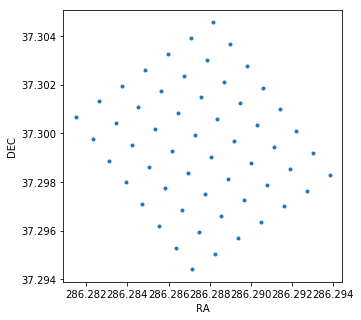

In [47]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
for i in range(0,1):
    filetag=taglist[i]#1,4,7,11
    targfile="kplr"+filetag+"_lpd-targ.fits.gz"
    infile=mydir+"/targ/003835482/"+targfile
    print(infile)
    hdulist=fits.open(infile)
    w=wcs.WCS(hdulist[2].header)
    maskimg, pixcoord1, pixcoord2, status= kep.readMaskDefinition(infile)
    print(cdelt2p)
    wc=getwcoord(pixcoord1,pixcoord2)
    n=len(maskimg.flatten())
    print(pixcoord1)
    ax.plot(wc.reshape(n,2).transpose()[0],wc.reshape(n,2).transpose()[1],".")
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
pylab.xlabel("RA")
pylab.ylabel("DEC")
plt.show()

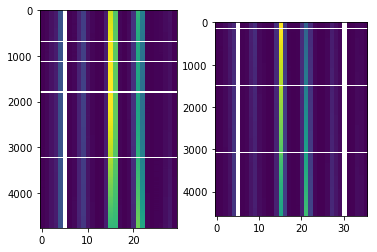

In [21]:
fig=plt.figure()
ax=fig.add_subplot(121)
ax.imshow(flux,aspect=0.01)
ax=fig.add_subplot(122)
ax.imshow(flux2,aspect=0.01)
plt.show()